# NLTK Demo

## First we'll do Geopy which is not NLP

In [1]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='Justin_Demo_App')

location = geolocator.geocode('Santa Fe, NM')

print((location.latitude, location.longitude))

print(location.raw)

(35.6869996, -105.9377997)
{'place_id': 235279350, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 171264, 'boundingbox': ['35.5880434', '35.7546236', '-106.1121583', '-105.8941768'], 'lat': '35.6869996', 'lon': '-105.9377997', 'display_name': 'Santa Fe, Santa Fe County, New Mexico, United States of America', 'class': 'boundary', 'type': 'administrative', 'importance': 0.7652548712385518, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png'}


## Sentiment Analysis

In [2]:
# imports
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
analyzer = sia()
results = []

df = pd.read_excel('eyh2020.xlsx', skiprows=7, index_col=0, usecols=[0,6], sheet_name=2)
df.columns = ['comments']
df.dropna(inplace=True)

for index, row in df.iterrows():
    score = analyzer.polarity_scores(row['comments'])
    score['comment'] = row['comments']
    results.append(score)

res_df = pd.DataFrame.from_records(results)
res_df.head()

# This will display the whole thing in a Jupyter notebook
# from IPython.core.display import HTML
# display(HTML(df.to_html()))

,neg,neu,pos,compound,comment
0,0.0,0.641,0.359,0.4215,I liked making slime and bouncy balls
1,0.0,0.833,0.167,0.4215,"I liked the bounce, splat, and stretch because..."
2,0.0,0.682,0.318,0.4215,I liked that we worked with different materials
3,0.0,0.682,0.318,0.4215,I liked when we made the bouncy balls
4,0.0,0.328,0.672,0.6249,It was awesome


## Tokenization

In [4]:
# tokenization example
example = "This is an example sentence! However, it isn't a very informative one~"

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [5]:
def normalize(lines):
    stop_words = stopwords.words('english')
    tokens = []
    for line in lines:
        tok = tokenizer.tokenize(line)
        tok = [t.lower() for t in tok if t.lower() not in stop_words]
        tokens.extend(tok)
    return tokens

## Frequency Distribution

In [6]:
pc = list(res_df[res_df.compound >= 0.25].comment)

pt = normalize(pc)
pf = FreqDist(pt)

pf.most_common(20)

[('liked', 69),
 ('fun', 30),
 ('like', 28),
 ('really', 14),
 ('make', 13),
 ('got', 11),
 ('different', 11),
 ('loved', 11),
 ('everything', 10),
 ('workshop', 9),
 ('slime', 8),
 ('awesome', 8),
 ('would', 8),
 ('hands', 7),
 ('think', 7),
 ('making', 6),
 ('cool', 6),
 ('lot', 5),
 ('hard', 5),
 ('things', 5)]

## Creating a Wordcloud

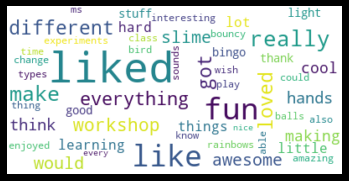

In [12]:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate_from_frequencies(dict(pf.most_common(50)))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()